In [32]:
import unicodecsv
import pandas as pd

# function read csv
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

#load CSV as list
people_filename = './data/people.csv'
people = read_csv(people_filename)

people[0]

{'32': '',
 'Age': '30',
 'Category': 'Adult',
 'Country 1': 'Australia',
 'Country 2': '',
 'Gender': 'F',
 'Job': 'Phd Student',
 'Number of kids': '0',
 'Place of living': 'Sydney',
 'REF': 'AUS001',
 'Type of school': 'Law, Health',
 'Years of studies': '10'}

In [33]:
# Look for duplicate in the ref value
print (len(people))
unique_people = set()
duplicate = list()
for person in people:
    if person['REF'] in unique_people:
        duplicate.append(person['REF'])
    unique_people.add(person['REF'])
print (len(unique_people))
print(duplicate)

437
437
[]


In [34]:
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return 0
    else:
        return int(i)

for person in people:
    person['Age'] = parse_maybe_int(person['Age'])
    person['Number of kids'] = parse_maybe_int(person['Number of kids'])
    person['Years of studies'] = parse_maybe_int(person['Years of studies'])
    
people[0]

{'32': '',
 'Age': 30,
 'Category': 'Adult',
 'Country 1': 'Australia',
 'Country 2': '',
 'Gender': 'F',
 'Job': 'Phd Student',
 'Number of kids': 0,
 'Place of living': 'Sydney',
 'REF': 'AUS001',
 'Type of school': 'Law, Health',
 'Years of studies': 10}

In [35]:
df_people = pd.DataFrame(people)
df_people.head()

,32,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Place of living,REF,Type of school,Years of studies
0,,30,Adult,Australia,,F,Phd Student,0,Sydney,AUS001,"Law, Health",10
1,,32,Adult,China,,F,Former Consultant,0,Paris,CHN01,Engineering,5
2,,69,Adult,France,,F,Retiree,3,Cucq,FR001,,1
3,,58,Adult,France,,M,Farmer,2,La Caloterie,FR002,,0
4,,28,Adult,Madagascar,,F,Singer,0,Paris,MAD001,,3


In [36]:
# Categories for quantitative attributes
categories = [
    {
        'index':'Age', 'indexCategory':'AgeCategory',
        'bins': [0, 15, 25, 35, 50, 65, 200], 'labels': ['0-15', '15-25', '25-35', '35-50', '50-65','65+']
    },
    {
        'index':'Years of studies', 'indexCategory':'YearsStudiesCategory',
        'bins': [0, 2, 5, 20], 'labels': ['0-2', '2-5', '5+']
    },
    {
        'index':'Number of kids', 'indexCategory':'NumberKidsCategory',
        'bins': [0, 0.1, 1, 5, 20], 'labels': ['0', '1', '2-5', '5+']
    }
]

# Create all category from nquantitative attribute
for i in range(len(categories)):
    df_people[categories[i]['indexCategory']] = pd.cut( 
        df_people[categories[i]['index']], 
        bins=categories[i]['bins'], 
        include_lowest=True, 
        labels=categories[i]['labels']
    )

df_people.head()


,32,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Place of living,REF,Type of school,Years of studies,AgeCategory,YearsStudiesCategory,NumberKidsCategory
0,,30,Adult,Australia,,F,Phd Student,0,Sydney,AUS001,"Law, Health",10,25-35,5+,0
1,,32,Adult,China,,F,Former Consultant,0,Paris,CHN01,Engineering,5,25-35,2-5,0
2,,69,Adult,France,,F,Retiree,3,Cucq,FR001,,1,65+,0-2,2-5
3,,58,Adult,France,,M,Farmer,2,La Caloterie,FR002,,0,50-65,0-2,2-5
4,,28,Adult,Madagascar,,F,Singer,0,Paris,MAD001,,3,25-35,2-5,0


In [37]:
df_people[['Gender','Age','AgeCategory']].to_csv('peopleWithCategories.csv')

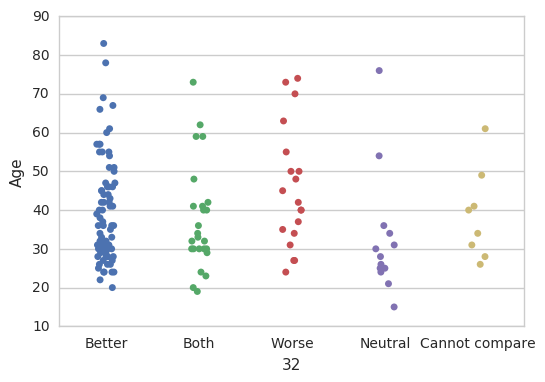

In [38]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

df_32 = df_people[df_people['32'] != '']
#sns.lmplot('Age', 'Years of studies', data=df_people, fit_reg=False)
#sns.stripplot(x="32", y="Age", data=df_people, jitter=True);
#sns.stripplot(x="32", y="Age", data=df_32, jitter=True);
sns.stripplot(x="32", y="Age", data=df_32, jitter=True);
#sns.swarmplot(x="32", y="Age", hue="Gender", data=df_32)

#heat map ? https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

In [55]:
summary32 = df_32.groupby(['32','Gender']).agg({'REF': 'count'})
# % compared to given category of 32
summary32total = summary32.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
# % compared to total
#summary32total = summary32.apply(lambda x:100 * x / float(x.sum()))
summary32total

REF
32             Gender           
Better         F       51.282051
               M       48.717949
Both           F       44.000000
               M       56.000000
Cannot compare F       50.000000
               M       50.000000
Neutral        F       53.846154
               M       46.153846
Worse          F       63.157895
               M       36.842105

In [39]:
#test data groupby
test = df_32.groupby(['NumberKidsCategory','32']).size().unstack()

test

32,Better,Both,Cannot compare,Neutral,Worse
NumberKidsCategory,,,,,
0,38.0,15.0,5.0,9.0,9.0
1,9.0,4.0,NaN,3.0,1.0
2-5,31.0,5.0,3.0,1.0,8.0
5+,NaN,1.0,NaN,NaN,1.0


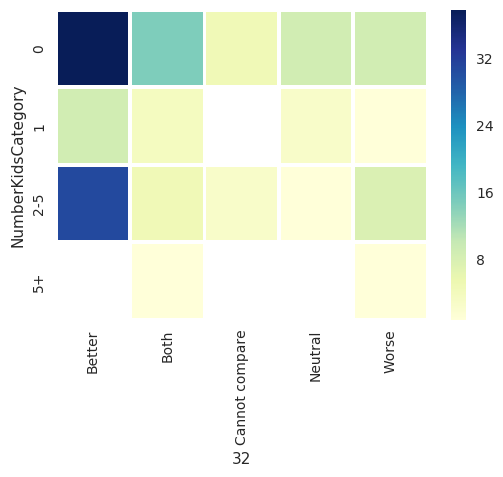

In [40]:
#test heatmap
# with cell annotation with value
# sns.heatmap(test2, annot=True, annot_kws={"size": 7}, linewidths=2, linecolor='white', cmap="YlGnBu")
sns.heatmap(test, linewidths=2, linecolor='white', cmap="YlGnBu")

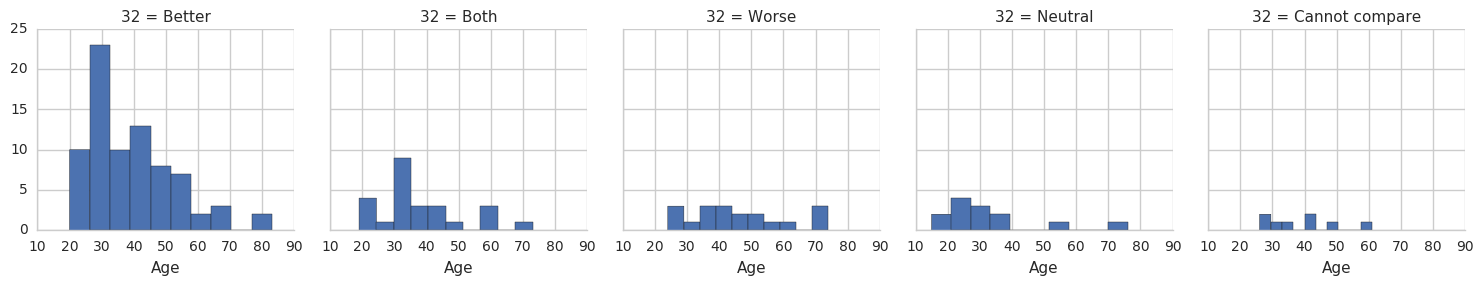

In [41]:
# test small multiples - 1
g = sns.FacetGrid(df_32, col="32")
g.map(plt.hist, "Age");

In [49]:
# test correlation categorical data
#df_32 = df_32.assign('C',df_32['32'].astype('category'))
df_32 = df_32.assign(cat32=df_32['32'].astype('category'))
# better : 10 , both : 5 , worse : 0, neutral & cannot compare > ~5
df_32['cat32'].cat.categories = [10,5,0,5.1,4.9]
df_32['cat32'] = df_32['cat32'].astype('float')
df_32.corr()
#df_32.head()

,Age,Number of kids,Years of studies,cat32
Age,1.000000,0.464230,0.101834,0.014324
Number of kids,0.464230,1.000000,-0.199018,0.010524
Years of studies,0.101834,-0.199018,1.000000,-0.082055
cat32,0.014324,0.010524,-0.082055,1.000000


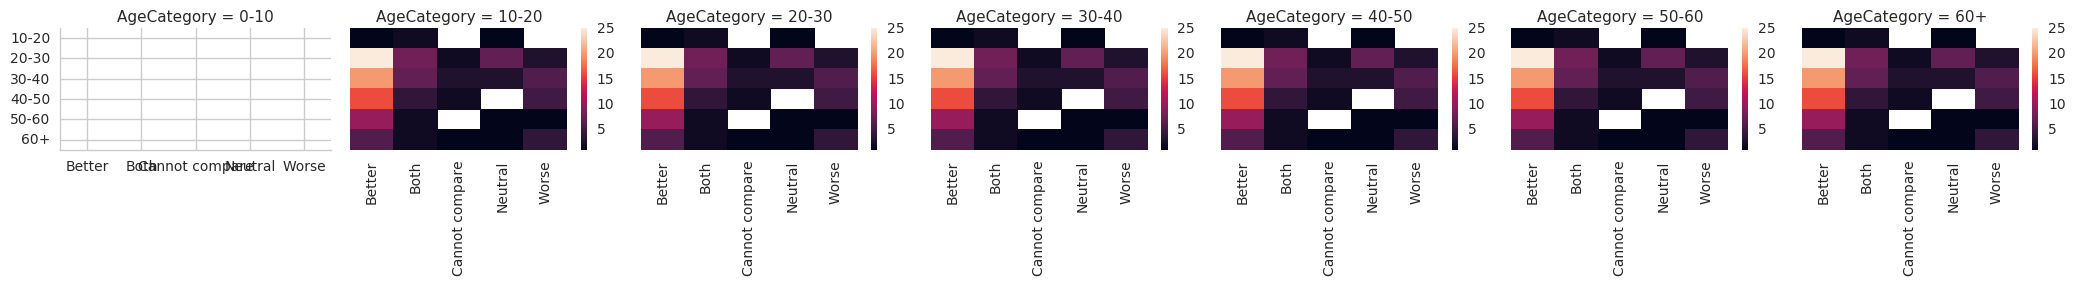

In [44]:
# test small multiples - 2
g = sns.FacetGrid(df_32, col="AgeCategory")
g.map_dataframe(lambda data, color: sns.heatmap( df_32.groupby(['AgeCategory','32']).size().unstack(), linewidths=0))


In [9]:
# Categories for qualitative attributes



In [57]:
#List unique values in Country column
countries = df_people["Country 1"].unique()
print(len(countries))

#List unique values in Place column
places = df_people["Place of living"].unique()
print(len(places))

54
82
